In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import sparse

In [2]:
from em import initialize, em, mle_em, em_bdct, mle_em_with_obj, mle_gd_with_obj

In [3]:
import time

# image 10 by 10

In [43]:
def run_init(max_step, threshold, sparse, ix=0):
    np.random.seed(0)
    start = time.time()
    y_rand = np.random.poisson(Ax)
    # x_initial = np.random.randn(len(x_flat))
    print(f"process: {ix: 2d}, y[:10]: {y_rand[:10]}")
    if sparse:
        x_init =  np.linalg.inv((A.T@A).todense())@(A.T@y_rand)
    else:
        x_init =  np.linalg.inv((A.T@A))@(A.T@y_rand)
    x_init = np.array(x_init).flatten()
    x_init = np.array([v if v>0.1 else 10 for v in x_init])
    x_et, diff, mse, objs, step = mle_em_with_obj(max_step, A, y_rand, x_true=x_flat, threshold=threshold, x_initial=x_init, sparse=sparse)
    print(f"process: {ix: 2d} finished. step: {step: 2d}, mse: {mse: 8.2f}, diff: {diff: 8.2f} time consuming: {time.time() - start: 8.1f} seconds")
    return x_et, diff, mse, objs, step

In [5]:
def run(max_step, threshold, sparse, ix=0):
    np.random.seed(0)
    start = time.time()
    y_rand = np.random.poisson(Ax)
    # x_initial = np.random.randn(len(x_flat))
    print(f"process: {ix: 2d}, y[:10]: {y_rand[:10]}")
    x_et, diff, mse, objs, step = mle_em_with_obj(max_step, A, y_rand, x_true=x_flat, threshold=threshold, sparse=sparse)
    print(f"process: {ix: 2d} finished. step: {step: 2d}, mse: {mse: 8.2f}, diff: {diff: 8.2f} time consuming: {time.time() - start: 8.1f} seconds")
    return x_et, diff, mse, objs, step

In [6]:
def run_gd(max_step, threshold, sparse, ix=0, alpha=0.01):
    np.random.seed(0)
    start = time.time()
    y_rand = np.random.poisson(Ax)
    # x_initial = np.random.randn(len(x_flat))
    print(f"process: {ix: 2d}, y[:10]: {y_rand[:10]}")
    x_et, diff, mse, objs, step = mle_gd_with_obj(max_step, A, y_rand, x_true=x_flat, threshold=threshold, sparse=sparse, alpha=alpha)
    print(f"process: {ix: 2d} finished. step: {step: 2d}, mse: {mse: 8.2f}, diff: {diff: 8.2f} time consuming: {time.time() - start: 8.1f} seconds")
    return x_et, diff, mse, objs, step

In [89]:
def run_gd_init(max_step, threshold, sparse, ix=0, alpha=0.01):
    np.random.seed(0)
    start = time.time()
    y_rand = np.random.poisson(Ax)
    if sparse:
        x_init =  np.linalg.inv((A.T@A).todense())@(A.T@y_rand)
    else:
        x_init =  np.linalg.inv((A.T@A))@(A.T@y_rand)
    x_init = np.array(x_init).flatten()
    x_init = np.array([v if v>0.1 else 10 for v in x_init])
    print(f"process: {ix: 2d}, y[:10]: {y_rand[:10]}")
    x_et, diff, mse, objs, step = mle_gd_with_obj(max_step, A, y_rand, x_true=x_flat, threshold=threshold, sparse=sparse, x_initial=x_init, alpha=alpha)
    print(f"process: {ix: 2d} finished. step: {step: 2d}, mse: {mse: 8.2f}, diff: {diff: 8.2f} time consuming: {time.time() - start: 8.1f} seconds")
    return x_et, diff, mse, objs, step

In [54]:
A_original = sparse.load_npz("data/simulated_large_A_23_10.npz")
x_flat = np.load("data/simulated_large_x_23_10.npy")

In [58]:
x_flat[0] = 20
x_flat[90] = 20

In [59]:
A = A_original*0.1
Ax = A @ x_flat

In [90]:
result_gd_init = run_gd_init(10000, 0.0001, True, alpha=1)

process:  0, y[:10]: [  3  24  44  59  66  60  58 116 131  97]
step:     0, lr:  1.0000, diff:  100.000000, mse:  308.879862:, obj: -143660.777382
step:    20, lr:  1.0000, diff:  0.212950, mse:  307.376685:, obj: -143667.310007
step:    40, lr:  1.0000, diff:  0.086493, mse:  305.886236:, obj: -143669.718442
step:    60, lr:  1.0000, diff:  0.049351, mse:  304.384985:, obj: -143670.998269
step:    80, lr:  1.0000, diff:  0.038498, mse:  302.922367:, obj: -143671.862021
step:   100, lr:  1.0000, diff:  0.030656, mse:  301.588865:, obj: -143672.554118
step:   120, lr:  1.0000, diff:  0.025598, mse:  300.322399:, obj: -143673.113163
step:   140, lr:  1.0000, diff:  0.022279, mse:  299.114960:, obj: -143673.588917
step:   160, lr:  1.0000, diff:  0.019644, mse:  297.989396:, obj: -143674.005875
step:   180, lr:  1.0000, diff:  0.017500, mse:  296.937042:, obj: -143674.375542
step:   200, lr:  1.0000, diff:  0.015720, mse:  295.950795:, obj: -143674.706323
step:   220, lr:  1.0000, diff:  

In [66]:
result_gd = run_gd(10000, 0.0001, True, alpha=1)

process:  0, y[:10]: [  3  24  44  59  66  60  58 116 131  97]
step:     0, lr:  1.0000, diff:  100.000000, mse:  3999.698616:, obj: -52980.867903
step:    20, lr:  1.0000, diff:  894.926869, mse:  3405.600437:, obj: -71546.182375
step:    40, lr:  1.0000, diff:  812.526550, mse:  2842.036024:, obj: -88606.345303
step:    60, lr:  1.0000, diff:  712.208176, mse:  2318.506106:, obj: -103836.255810
step:    80, lr:  1.0000, diff:  590.833080, mse:  1848.250031:, obj: -116842.720417
step:   100, lr:  1.0000, diff:  448.359290, mse:  1448.526000:, obj: -127194.536629
step:   120, lr:  1.0000, diff:  296.530937, mse:  1137.031034:, obj: -134561.927390
step:   140, lr:  1.0000, diff:  164.031980, mse:  920.696872:, obj: -139037.914512
step:   160, lr:  1.0000, diff:  80.152041, mse:  785.514197:, obj: -141354.580920
step:   180, lr:  1.0000, diff:  37.687485, mse:  705.983260:, obj: -142457.784416
step:   200, lr:  1.0000, diff:  17.504020, mse:  658.790591:, obj: -142976.930346
step:   220,

In [67]:
result_em = run(2000, 0.0001, True)

process:  0, y[:10]: [  3  24  44  59  66  60  58 116 131  97]
step:     0, diff:  100.000000, mse:  773.637465:, obj: -142515.463644
step:    20, diff:  2.672889, mse:  346.065863:, obj: -143640.982376
step:    40, diff:  0.560975, mse:  300.257335:, obj: -143664.301447
step:    60, diff:  0.236174, mse:  283.245870:, obj: -143671.432347
step:    80, diff:  0.126730, mse:  276.223930:, obj: -143674.848891
step:   100, diff:  0.075937, mse:  273.318062:, obj: -143676.794757
step:   120, diff:  0.048252, mse:  272.383640:, obj: -143677.997302
step:   140, diff:  0.031941, mse:  272.434529:, obj: -143678.777516
step:   160, diff:  0.021880, mse:  272.957151:, obj: -143679.302966
step:   180, diff:  0.015449, mse:  273.676015:, obj: -143679.668454
step:   200, diff:  0.011207, mse:  274.445769:, obj: -143679.930086
step:   220, diff:  0.008325, mse:  275.193023:, obj: -143680.122194
step:   240, diff:  0.006313, mse:  275.883745:, obj: -143680.266416
step:   260, diff:  0.004872, mse:  27

In [68]:
result_em_init = run_init(2000, 0.0001, True)

process:  0, y[:10]: [  3  24  44  59  66  60  58 116 131  97]
step:     0, diff:  100.000000, mse:  291.073713:, obj: -143670.096581
step:    20, diff:  0.093480, mse:  270.631432:, obj: -143678.222643
step:    40, diff:  0.036955, mse:  272.639229:, obj: -143679.378168
step:    60, diff:  0.018554, mse:  274.529636:, obj: -143679.895461
step:    80, diff:  0.010811, mse:  275.856164:, obj: -143680.175359
step:   100, diff:  0.006993, mse:  276.789455:, obj: -143680.347502
step:   120, diff:  0.004851, mse:  277.472362:, obj: -143680.463031
step:   140, diff:  0.003522, mse:  277.993342:, obj: -143680.545130
step:   160, diff:  0.002636, mse:  278.405435:, obj: -143680.605705
step:   180, diff:  0.002015, mse:  278.740849:, obj: -143680.651555
step:   200, diff:  0.001565, mse:  279.019667:, obj: -143680.686903
step:   220, diff:  0.001231, mse:  279.254868:, obj: -143680.714538
step:   240, diff:  0.000978, mse:  279.455212:, obj: -143680.736388
step:   260, diff:  0.000784, mse:  27

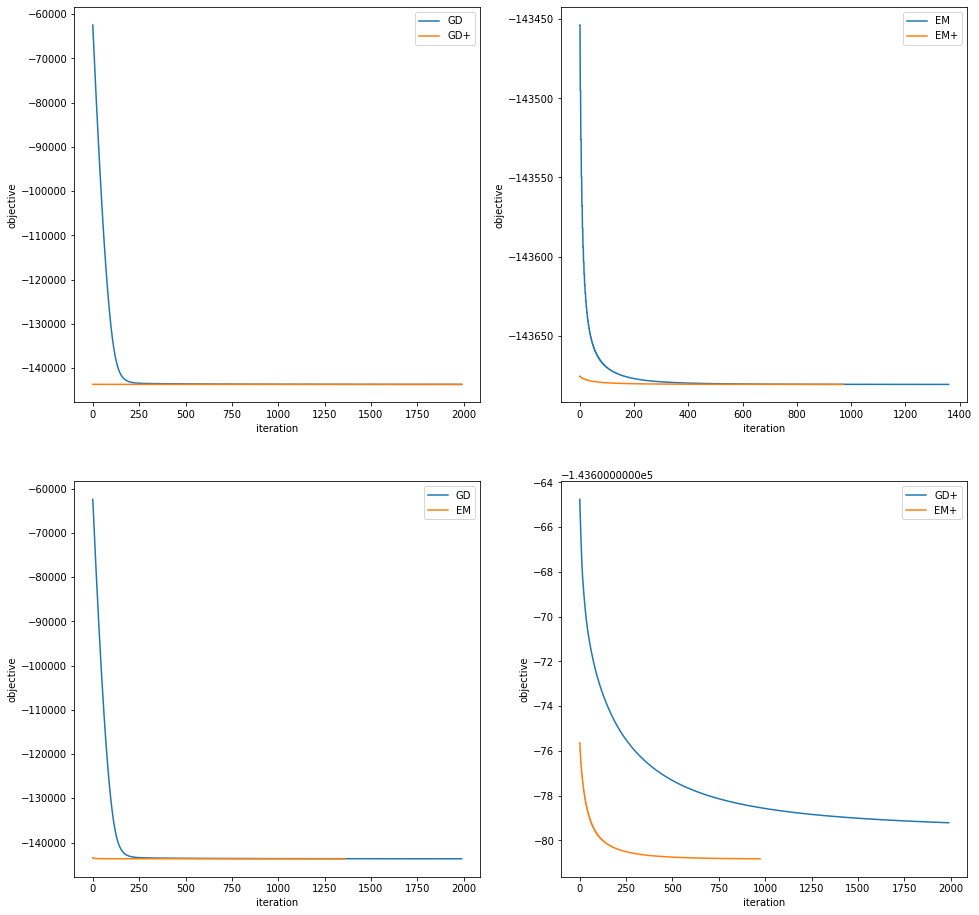

In [121]:
fig = plt.figure()
fig.set_size_inches(16, 16)

plt.subplot(2, 2, 1)
plt.plot(result_gd[-2][10:2000])
plt.plot(result_gd_init[-2][10:2000])
plt.legend(["GD", "GD+"])
plt.xlabel("iteration")
plt.ylabel("objective")

plt.subplot(2, 2, 2)
plt.plot(result_em[-2][10:2000])
plt.plot(result_em_init[-2][10:2000])
plt.legend(["EM", "EM+"])
plt.xlabel("iteration")
plt.ylabel("objective")

plt.subplot(2, 2, 3)
plt.plot(result_gd[-2][10:2000])
plt.plot(result_em[-2][10:2000])
plt.legend(["GD", "EM"])
plt.xlabel("iteration")
plt.ylabel("objective")

plt.subplot(2, 2, 4)
plt.plot(result_gd_init[-2][10:2000])
plt.plot(result_em_init[-2][10:2000])
plt.legend(["GD+", "EM+"])
plt.xlabel("iteration")
plt.ylabel("objective")
plt.savefig("itr_obj.png")

Text(0, 0.5, 'objective')

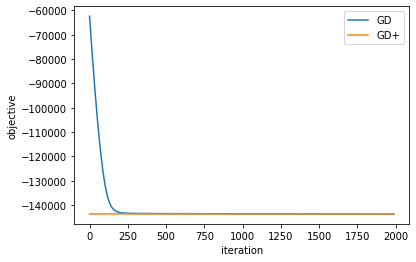

In [125]:
fig = plt.figure()
plt.plot(result_gd[-2][10:2000])
plt.plot(result_gd_init[-2][10:2000])
plt.legend(["GD", "GD+"])
plt.xlabel("iteration")
plt.ylabel("objective")

Text(0, 0.5, 'objective')

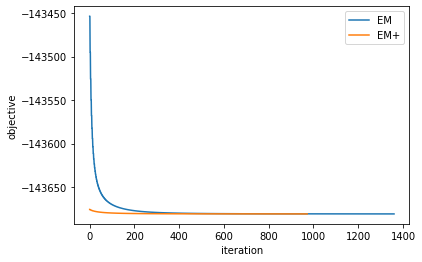

In [122]:
fig = plt.figure()
plt.plot(result_em[-2][10:2000])
plt.plot(result_em_init[-2][10:2000])
plt.legend(["EM", "EM+"])
plt.xlabel("iteration")
plt.ylabel("objective")

Text(0, 0.5, 'objective')

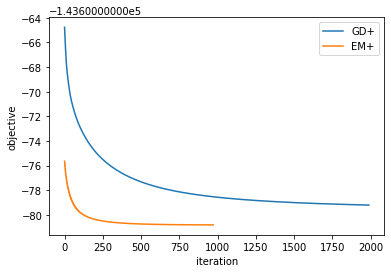

In [123]:
fig = plt.figure()
plt.plot(result_gd_init[-2][10:2000])
plt.plot(result_em_init[-2][10:2000])
plt.legend(["GD+", "EM+"])
plt.xlabel("iteration")
plt.ylabel("objective")

Text(0, 0.5, 'objective')

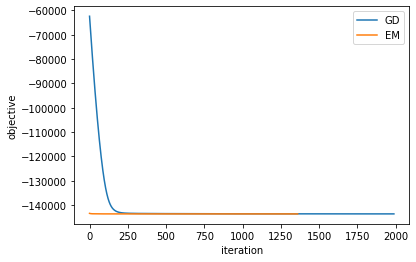

In [124]:
fig = plt.figure()
plt.plot(result_gd[-2][10:2000])
plt.plot(result_em[-2][10:2000])
plt.legend(["GD", "EM"])
plt.xlabel("iteration")
plt.ylabel("objective")

# Image 100 by 100

In [39]:
A = sparse.load_npz("data/simulated_large_A_117_100.npz")
x_flat = np.load("data/simulated_large_x_117_100.npy")
Ax = A@x_flat
# y = np.random.poisson(Ax)
print("Image vector x is of shape {}".format(np.shape(x_flat)))
print("Mixing matrix A is of shape {}".format(np.shape(A)))
# print("Observation matrix Y is of shape {}".format(np.shape(y)))

Image vector x is of shape (10000,)
Mixing matrix A is of shape (33362, 10000)


In [126]:
# x_et, diff, mse, objs, step = run_init(1000, 0.1, True)

# Image 50 by 50

In [44]:
A = np.load("simulated_large_A.npy")
x_flat = np.load("simulated_large_x.npy")
Ax = A@x_flat
print("Image vector x is of shape {}".format(np.shape(x_flat)))
print("Mixing matrix A is of shape {}".format(np.shape(A)))

Image vector x is of shape (2500,)
Mixing matrix A is of shape (3108, 2500)


In [45]:
x_et, diff, mse, objs, step = run_init(1000, 0.01, False)

process:  0, y[:10]: [  2   1   9   0   8   9  11  28 600 811]
step:     0, diff:  100.000000, mse:  2889.664090:, obj: -22172085.856553
step:    20, diff:  72.291757, mse:  2711.458246:, obj: -22203029.836827
step:    40, diff:  20.073959, mse:  2662.408212:, obj: -22203769.786324
step:    60, diff:  9.137955, mse:  2634.982122:, obj: -22204035.090214
step:    80, diff:  5.290779, mse:  2614.991839:, obj: -22204171.900099
step:   100, diff:  3.530588, mse:  2598.630061:, obj: -22204257.258813
step:   120, diff:  2.576803, mse:  2584.459032:, obj: -22204316.998193
step:   140, diff:  1.995295, mse:  2571.798732:, obj: -22204361.999263
step:   160, diff:  1.609065, mse:  2560.268698:, obj: -22204397.610848
step:   180, diff:  1.335737, mse:  2549.628121:, obj: -22204426.777582
step:   200, diff:  1.132908, mse:  2539.711115:, obj: -22204451.268951
step:   220, diff:  0.976919, mse:  2530.396878:, obj: -22204472.225157
step:   240, diff:  0.853637, mse:  2521.594162:, obj: -22204490.4232

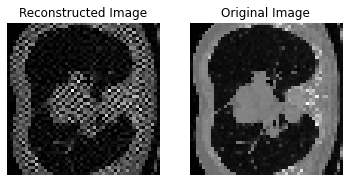

In [46]:
size = int(np.sqrt(A.shape[1]))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_et.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

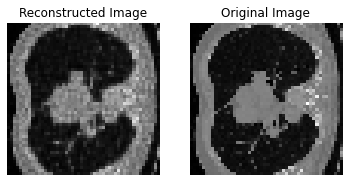

In [5]:
size = int(np.sqrt(A.shape[1]))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_et.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

# Image 2

In [31]:
A = sparse.load_npz('/nfs/stak/users/zhoutian/Downloads/simulated_large_A_20_50.npz')
x_flat = np.load("/nfs/stak/users/zhoutian/Downloads/simulated_large_x_20_50.npy")
Ax = A@x_flat
y = np.random.poisson(Ax)
print("Image vector x is of shape {}".format(np.shape(x_flat)))
print("Mixing matrix A is of shape {}".format(np.shape(A)))
print("Observation matrix Y is of shape {}".format(np.shape(y)))

Image vector x is of shape (2500,)
Mixing matrix A is of shape (2777, 2500)
Observation matrix Y is of shape (2777,)


In [36]:
def mc_run(n, max_step=500, threshold=2, sparse=True):
    etms = []
    for i in range(n):
        print(f"{i}th run start =>")
        y = np.random.poisson(Ax)
        x_et, diff, mse, step = mle_em(max_step, A, y, x_true=x_flat, threshold=threshold, x_initial=None, sparse=sparse)
        etms.append([x_et, diff, mse, step])
    return etms

In [13]:
x_aver = np.mean([e[0] for e in etms ], axis=0)

In [14]:
x_aver

array([112.61630754, 150.40308926, 245.56907365, ..., 111.88822054,
       123.6858849 , 125.4410671 ])

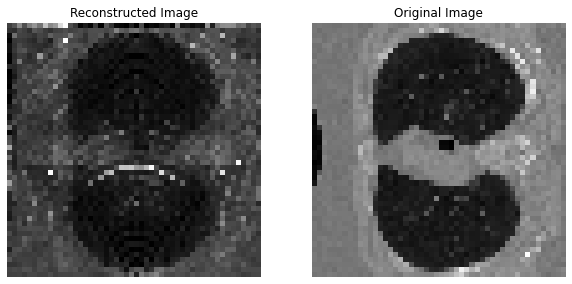

In [25]:
size = int(np.sqrt(A.shape[1]))

fig = plt.figure()
fig.set_size_inches(10,5)
plt.subplot(1, 2, 1)
plt.imshow(x_aver.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, ssparse, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

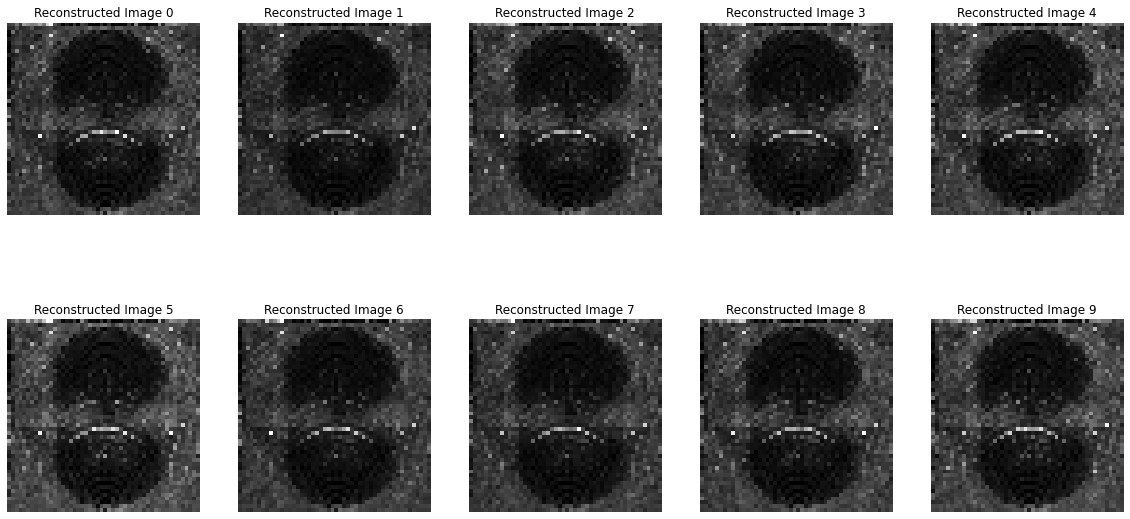

In [24]:
fig = plt.figure()
fig.set_size_inches(20,10)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(etms[i][0].reshape(size, size), cmap='gray')
    plt.title(f'Reconstructed Image {i}')
    plt.axis('off')

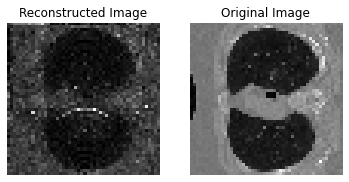

In [11]:
size = int(np.sqrt(A.shape[1]))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_et.reshape(size, size), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_flat.reshape(size, size), cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()